In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from fuzzywuzzy import fuzz

/home/shivanggupta1994/venv/lib/python3.5/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
class Paper:
    def __init__(self):
        self.outlinks = []
        self.inlinks = []
        self.abstract = ""
        self.page_rank = 1
        self.authors = []
        self.keywords = []
#         self.authors_org = []
        self.journal = None
        self.year = None
        self.title = None
        self.id = None
        self.duration = None
        
    def __repr__(self):
        print("###########\noutlinks = %s\n, inlinks = %s\n, abstract = %s\n, keywords = %s\n, page_rank = %s\n, authors \
              = %s\n, journal = %s\n, year = %s\n, title = %s\n, id = %s\n###########\n" % (str(self.outlinks), str(self.inlinks), str(self.abstract) \
             , str(self.keywords), str(self.page_rank), str(self.authors), str(self.journal), str(self.year), str(self.title), str(self.id)))
        return "###########\noutlinks = {}\n, inlinks = {}\n, abstract = {}\n, keywords = {}\n, page_rank = {}\n, authors \
              = {}\n, journal = {}\n, year = {}\n, title = {}\n, id = {}\n###########\n".format(str(self.outlinks), str(self.inlinks), str(self.abstract) \
             , str(self.keywords), str(self.page_rank), str(self.authors), str(self.journal), str(self.year), str(self.title), str(self.id))
    def __str__(self):
        print("###########\noutlinks = %s\n, inlinks = %s\n, abstract = %s\n, keywords = %s\n, page_rank = %s\n, authors \
              = %s\n, journal = %s\n, year = %s\n, title = %s\n, id = %s\n###########\n" % (str(self.outlinks), str(self.inlinks), str(self.abstract) \
             , str(self.keywords), str(self.page_rank), str(self.authors), str(self.journal), str(self.year), str(self.title), str(self.id)))
        return "###########\noutlinks = {}\n, inlinks = {}\n, abstract = {}\n, keywords = {}\n, page_rank = {}\n, authors \
              = {}\n, journal = {}\n, year = {}\n, title = {}\n, id = {}\n###########\n".format(str(self.outlinks), str(self.inlinks), str(self.abstract) \
             , str(self.keywords), str(self.page_rank), str(self.authors), str(self.journal), str(self.year), str(self.title), str(self.id))

In [3]:
def parse_file(filepath, graph):
    with open(filepath, "r") as f:
        content = f.readlines()
    
    print(content[:20])
    print(len(content))
    obj = None
    i = 0
    while i < len(content):
        if not obj:
            obj = Paper()
        
        if content[i] == '  \n':
#             print("here")
            graph[obj.id] = obj
            obj = None
        else:
#             print("here")
            try:
                if content[i][1] == "*":
                    obj.title = content[i][2:].rstrip("\n")
                elif content[i][1] == "@":
                    obj.authors = content[i][2:].rstrip("\n").split(",")
                elif content[i][1] == "t":
                    obj.year = int(content[i][2:].rstrip("\n"))
                elif content[i][1] == "c":
                    obj.journal = content[i][2:].rstrip("\n")
                elif content[i][1] == "i":
                    obj.id = content[i][6:].rstrip("\n")
                elif content[i][1] == "%":
                    obj.outlinks.append(content[i][2:].rstrip("\n"))
                elif content[i][1] == "!":
                    obj.abstract = content[i][2:].rstrip("\n")
            except:
#                 print(i)
                print(content[i])
            
        i += 1
        
    

In [ ]:
citation_graph = {}
parse_file("data/DBLP_Citation_2014_May/publications.txt", citation_graph)

['#*OQL[C++]: Extending C++ with an Object Query Capability.\n', '#@José A. Blakeley\n', '#t1995\n', '#cModern Database Systems\n', '#index2\n', '#% \n', '#!\n', '  \n', '#*Transaction Management in Multidatabase Systems.\n', '#@Yuri Breitbart,Hector Garcia-Molina,Abraham Silberschatz\n', '#t1995\n', '#cModern Database Systems\n', '#index3\n', '#% \n', '#!\n', '  \n', '#*Overview of the ADDS System.\n', '#@Yuri Breitbart,Tom C. Reyes\n', '#t1995\n', '#cModern Database Systems\n']
20797701


In [ ]:
import csv

conf_full_dict = {}
conf_abbr_dict = {}

with open("data/conf.csv", "r+") as f:
    csv_reader = csv.reader(f, delimiter=',')
    for row in csv_reader:
        conf_full_dict[row[1].lower()] = int(row[3])
        conf_abbr_dict[row[2].lower()] = int(row[3])
print(len(conf_full_dict))
print(len(conf_abbr_dict))

In [ ]:
citation_graph["27"]

In [ ]:
def init_dict(df, graph):
    for index, row in df.iterrows():
        id = row["id"]
        if id not in graph.keys():
            graph[id] = Paper()
            graph[id].outlinks = [] if not isinstance(row["references"], list) else row["references"]
            graph[id].abstract = "" if(row["abstract"]==None) else row["abstract"]
            graph[id].keywords = [] if not isinstance(row["keywords"], list) else row["keywords"]
            graph[id].n_citations = row["n_citation"]
    #         authors = json.loads(row["authors"])
    #         print(row["authors"])
            if isinstance(row["authors"], list):
                for author in row["authors"]:
                    org = ""
                    name = ""
                    if "org" in author.keys():
                        org = author["org"]
                    if "name" in author.keys():
                        name = author["name"]

                    graph[id].authors.append((name, org))

            graph[id].journal = "" if(row["venue"]==None) else row["venue"]
            graph[id].year =  1700 if(row["year"]==None) else row["year"]
            graph[id].title = "" if(row["title"]==None) else row["title"]
import math        
def fill_dict(graph):
    length = len(graph.keys())
    for id in graph.keys():
        graph[id].inlinks = []
    for id in graph.keys():
        graph[id].page_rank = 1/length
        refs = graph[id].outlinks
#         print(refs)
        for ref in refs:
            if ref in graph.keys():
                graph[ref].inlinks.append(id)
    unique_years = []
    for id in graph.keys():
        if(math.isnan(graph[id].year)):
            graph[id].year = 1700
        if graph[id].year != 1700:
            unique_years.append(2018 - graph[id].year)
            graph[id].duration = 2018 - graph[id].year
#     print(list(unique_years))
    median_duration = np.median(list(unique_years))
    print(median_duration)
    for id in graph.keys():
        if graph[id].year == 1700:
            graph[id].duration = median_duration

In [ ]:
def reset_page_rank(graph):
    length = len(graph.keys())
    for id in graph.keys():
        graph[id].page_rank = 1/length

In [9]:
# refer here  : http://dpk.io/pagerank
def page_rank(maxiters, epsilon, damping, graph):
    for i in range(maxiters):
        print(i)
        old_ranks = {}
        for id in graph.keys():
            old_ranks[id] = graph[id].page_rank
            page_rank = (1-damping)/len(graph.keys())
            citations = graph[id].inlinks
            for cite_id in citations:
                page_rank += damping*(graph[cite_id].page_rank/len(graph[cite_id].outlinks))
#             print(page_rank)
#             if len(citations)!=0:
            graph[id].page_rank = page_rank
        delta = sum([abs(old_ranks[id] - graph[id].page_rank) for id in graph.keys()])
        if delta < epsilon:
            break


In [15]:
with open("unfilled_dict.pkl", "wb") as f:
    pickle.dump(citation_graph, f)

In [36]:
fill_dict(citation_graph)

12.0


In [37]:
reset_page_rank(citation_graph)
page_rank(100,1.0e-8,0.85, citation_graph)

0
1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

In [16]:
with open("page_rank_dict_dblp7.pkl", "wb") as f:
    pickle.dump(conf_full_dict, f)

In [26]:
citation_graph = {}
with open("page_rank_dict_dblp7.pkl", "rb+") as f:
    citation_graph = pickle.load(f)

EOFError: Ran out of input

In [17]:
max_h5_index = max(conf_full_dict, key = lambda x : conf_full_dict[x])
max_h5_index = conf_full_dict[max_h5_index]
min_h5_index = min(conf_full_dict, key = lambda x : conf_full_dict[x])
min_h5_index = conf_full_dict[min_h5_index]

for conf_name in conf_full_dict.keys():
    conf_full_dict[conf_name] = (conf_full_dict[conf_name] - min_h5_index)/(max_h5_index - min_h5_index)
for conf_name in conf_abbr_dict.keys():
    conf_abbr_dict[conf_name] = (conf_abbr_dict[conf_name] - min_h5_index)/(max_h5_index - min_h5_index)


In [28]:
with open("test.pkl", "wb") as f:
    pickle.dump(conf_full_dict, f)

In [30]:
temp = {}
with open("test.pkl", "rb+") as f:
    temp = pickle.load(f)
len(temp)

945

In [22]:
count = 0
count1 = 0
conf_dict_merged = {**conf_full_dict, **conf_abbr_dict}
del conf_dict_merged[""]
conf_names = sorted(conf_dict_merged.keys())
from collections import defaultdict
alpha_conf_dict = defaultdict(list)
for conf_name in conf_names:
    alpha_conf_dict[conf_name[0]].append(conf_name)

for i,id in enumerate(list(citation_graph.keys())):
    p_obj = citation_graph[id]
    if p_obj.journal.lower() in alpha_conf_dict[p_obj.journal.lower()[0]]:
        count += 1
        citation_graph[id].page_rank *= conf_dict_merged[p_obj.journal.lower()]
    else:
        fz_ratio_max = 0
        fz_conf = ""
        j = p_obj.journal.lower()
        for conf in alpha_conf_dict[j[0]]:
            fz_ratio = fuzz.ratio(j, conf)
            if fz_ratio > fz_ratio_max:
                fz_ratio_max = fz_ratio
                fz_conf = conf
        if fz_ratio_max == 0:
            count1 += 1
            citation_graph[id].page_rank *= 0.5
        else:
            citation_graph[id].page_rank *= conf_dict_merged[fz_conf]
    if i%1000 == 0:
        print(i)
            
print("%d/%d" % (count, len(citation_graph)))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


KeyboardInterrupt: 

In [103]:
print("%d/%d" % (count1, len(citation_graph)))

10430/2146341


In [27]:
page_ranks = set()
for id in citation_graph.keys():
    page_ranks.add(citation_graph[id].page_rank)
print(len(page_ranks))

335146


In [25]:
with open("page_rank_dict.pkl", "wb") as f:
    pickle.dump(citation_graph, f)

In [34]:
print(os.listdir("./aminer_papers_0"))

['aminer_papers_0.txt', 'aminer_papers_1.txt', 'aminer_papers_10.txt', 'aminer_papers_11.txt', 'aminer_papers_12.txt', 'aminer_papers_13.txt', 'aminer_papers_14.txt', 'aminer_papers_15.txt', 'aminer_papers_16.txt', 'aminer_papers_17.txt', 'aminer_papers_18.txt', 'aminer_papers_19.txt', 'aminer_papers_2.txt', 'aminer_papers_20.txt', 'aminer_papers_21.txt', 'aminer_papers_22.txt', 'aminer_papers_23.txt', 'aminer_papers_24.txt', 'aminer_papers_25.txt', 'aminer_papers_26.txt', 'aminer_papers_27.txt', 'aminer_papers_28.txt', 'aminer_papers_29.txt', 'aminer_papers_3.txt', 'aminer_papers_4.txt', 'aminer_papers_5.txt', 'aminer_papers_6.txt', 'aminer_papers_7.txt', 'aminer_papers_8.txt', 'aminer_papers_9.txt']


In [3]:
with open('page_rank_dict.pkl', "rb") as file:
    citation_graph = pickle.load(file)

In [28]:
len(citation_graph)

2146341

In [51]:
class Author:
    def __init__(self):
        self.author_org_list = []
        self.paper_list = []
        self.citations = []
        self.author_score = 0
        self.author_score_2 = 0
        self.author_score_list = []
        self.h_index = 0
        
def create_author_map(graph):
    authors_map = {}
    for paper_id in graph.keys():
        for a_index,a_name in enumerate(graph[paper_id].authors):
            if a_name and len(a_name) != 0 and "null" not in a_name:
                if a_name not in authors_map.keys():
                    authors_map[a_name] = Author()
#                 authors_map[a_name].author_org_list.append(a_org)
                authors_map[a_name].paper_list.append(paper_id)
                authors_map[a_name].citations.append(len(graph[paper_id].inlinks))
                authors_map[a_name].author_score += graph[paper_id].page_rank
                author_index_weight = 1/(2**a_index)
                authors_map[a_name].author_score_list.append(author_index_weight*graph[paper_id].page_rank*math.log10(((len(graph[paper_id].inlinks) + 1)/graph[paper_id].duration)))
        
    for a_name in authors_map.keys():
#         authors_map[a_name].author_score = authors_map[a_name].author_score / len(authors_map[a_name].paper_list)
#         authors_map[a_name].author_score_2 = np.median(authors_map[a_name].author_score_list)
         authors_map[a_name].author_score_2 = np.median(authors_map[a_name].author_score_list) + math.log10(len(authors_map[a_name].paper_list))/len(citation_graph)
    return authors_map
        

In [52]:
author_map = create_author_map(citation_graph)

In [53]:
author_names[:100]

['Bui Tuong Phong',
 'James W. Layland',
 'Veronica Falcao',
 'Mitesh Suchak',
 'Neophytos Iacovou',
 'Josh Broch',
 'Anit Chakraborty',
 'Hal L. Feinstein',
 'Neil D. McKay',
 'Jonathan Gibbons',
 'Mary Ann Marcinkiewicz',
 'Beatrice Santorini',
 'Vera Watson',
 'Lee R. Gordon',
 'Scott R. Parry',
 'Vincent D. Park',
 'Burton H. Bloom',
 'Craig W. Reynolds',
 'Robert A. Schumacker',
 'Fernando G. Palacios',
 'Norbert Beckmann',
 'Margaret J. Corasick',
 'Elliot Schwartz',
 'William Adjie-Winoto',
 'M. Kirby',
 'John W. Tukey',
 'Mike Woo',
 'Stephen Barnhill',
 'Alan E. Kulawik',
 'Jakov N. Seizovic',
 'David Maltz',
 'Jonathan A. Zarge',
 'Tony Ballardie',
 'Douglas S. J. De Couto',
 'Bruce Jay Nelson',
 'Martin Lades',
 'Hervé Da Costa',
 'David Hecherman',
 'Hu Imm Lee',
 'Gregory A. Klanderman',
 'C. Katz',
 'Elena Pacenti',
 'Gregory K. Wallace',
 'Robert A. Drebin',
 'Terence Tong',
 'Susan Irwin',
 'Hans Eriksson',
 'Jack Tzu-Chieh Tsai',
 'Martin Roesch',
 'Mark Rosenstein',
 

In [54]:
def calc_h_index(author_map):
    for a_name in author_map.keys():
        author_map[a_name].citations.sort()
        i = 0
        l = len(author_map[a_name].citations)
        while i < l and author_map[a_name].citations[l-1-i] > i:
            i += 1
        author_map[a_name].h_index = i
        
        
        
        

In [55]:
calc_h_index(author_map)


In [56]:
#[((citation_graph[x].year, sum([citation_graph[x].n_citations if for y in author_map['WANG Wei'].paper_list])) for x in author_map['WANG Wei'].paper_list))

def year_wise_citations(a_name):
    paper_list = author_map[a_name].paper_list
    print(len(paper_list))
    from collections import defaultdict
    d = defaultdict(int)
    for p_id in paper_list:
        d[citation_graph[p_id].year] += len(citation_graph[p_id].inlinks)
    return sorted([(k,d[k]) for k in d.keys()], key = lambda x: x[0])


In [9]:
with open("author_map.pkl", "rb") as f:
    author_map = pickle.load(f)

In [57]:
def top_n(n, auths):
    return auths[:n]

In [58]:
author_names_h = sorted(author_map.keys(), key = lambda x: author_map[x].h_index)[::-1]
author_names = sorted(author_map.keys(), key = lambda x: author_map[x].author_score_2)[::-1]

top_n_our_index = top_n(5, author_names)
top_n_h_index = top_n(5, author_names_h)

In [59]:
author_names_h[:50]

['Hector Garcia-Molina',
 'Scott Shenker',
 'Jiawei Han',
 'Christos Faloutsos',
 'Rakesh Agrawal',
 'Moni Naor',
 'Thomas A. Henzinger',
 'Christos H. Papadimitriou',
 'Anil K. Jain',
 'Philip S. Yu',
 'Jennifer Widom',
 'David E. Culler',
 'Rajeev Motwani',
 'Ian T. Foster',
 'Mihir Bellare',
 'David J. DeWitt',
 'Deborah Estrin',
 'Dan Suciu',
 'Hari Balakrishnan',
 'W. Bruce Croft',
 'Ronald Fagin',
 'Jon M. Kleinberg',
 'Jeffrey D. Ullman',
 'Oded Goldreich',
 'Michael Stonebraker',
 'Thomas E. Anderson',
 'Robert Endre Tarjan',
 'Raghu Ramakrishnan',
 'Mihalis Yannakakis',
 'Amit Sahai',
 'Moshe Y. Vardi',
 'Joseph M. Hellerstein',
 'Edmund M. Clarke',
 'Martín Abadi',
 'Thomas W. Reps',
 'Jeffrey F. Naughton',
 'Dan Boneh',
 'Ravi Kumar',
 'Ran Canetti',
 'Pat Hanrahan',
 'H. V. Jagadish',
 'Amir Pnueli',
 'Ion Stoica',
 'Ken Kennedy',
 'Rajeev Alur',
 'Madhu Sudan',
 'Wei-Ying Ma',
 'Robert E. Schapire',
 'Serge Abiteboul',
 'Brent Waters']

In [60]:
author_names.index('Matthias Mann')

107201

In [61]:
author_names[:50]

['Bui Tuong Phong',
 'Josh Broch',
 'James W. Layland',
 'Neophytos Iacovou',
 'Vincent D. Park',
 'Burton H. Bloom',
 'Anit Chakraborty',
 'Craig W. Reynolds',
 'Norbert Beckmann',
 'William Adjie-Winoto',
 'M. Kirby',
 'Neil D. McKay',
 'Veronica Falcao',
 'Mitesh Suchak',
 'Beatrice Santorini',
 'Tony Ballardie',
 'Martin Lades',
 'Gregory K. Wallace',
 'Robert A. Drebin',
 'Scott R. Parry',
 'Hans Eriksson',
 'Martin Roesch',
 'Steven Cameron Woo',
 'Hal L. Feinstein',
 'Margaret J. Corasick',
 'Elliot Schwartz',
 'Xuanli Lisa Xie',
 'Mike Woo',
 'Nanette J. Boden',
 'Timothy J. Shepard',
 'Mary Ann Marcinkiewicz',
 'Richard M. Russell',
 'Thaddeus Beier',
 'Jonathan A. Zarge',
 'Anne Dardenne',
 'Bruce Jay Nelson',
 'Hervé Da Costa',
 'Gregory A. Klanderman',
 'Thomas M. J. Fruchterman',
 'Didier Le Gall',
 'Pierre Guerrier',
 'Terence Tong',
 'Alfarez Abdul-Rahman',
 'Jack Tzu-Chieh Tsai',
 'Brett Warneke',
 'Tijs van Dam',
 'Robert A. Schumacker',
 'David Maltz',
 'Martin E. New

In [41]:
author_map['istvan simon'].paper_list

KeyError: 'istvan simon'

In [62]:
for author in author_names[:100]:
    print(author, year_wise_citations(author))
    

1
Bui Tuong Phong [(1975, 239)]
2
Josh Broch [(1998, 702), (1999, 31)]
1
James W. Layland [(1973, 1260)]
1
Neophytos Iacovou [(1994, 812)]
2
Vincent D. Park [(1997, 321), (2010, 2)]
1
Burton H. Bloom [(1970, 810)]
1
Anit Chakraborty [(2000, 526)]
2
Craig W. Reynolds [(1987, 626), (1994, 0)]
2
Norbert Beckmann [(1990, 1049), (2009, 1)]
1
William Adjie-Winoto [(1999, 155)]
2
M. Kirby [(1990, 244), (2011, 0)]
1
Neil D. McKay [(1992, 908)]
1
Veronica Falcao [(1992, 515)]
1
Mitesh Suchak [(1994, 812)]
2
Beatrice Santorini [(1991, 0), (1993, 908)]
1
Tony Ballardie [(1993, 161)]
2
Martin Lades [(1993, 244)]
2
Gregory K. Wallace [(1991, 247)]
1
Robert A. Drebin [(1988, 214)]
1
Scott R. Parry [(1986, 322)]
1
Hans Eriksson [(1994, 122)]
1
Martin Roesch [(1999, 364)]
2
Steven Cameron Woo [(1994, 0), (1995, 781)]
1
Hal L. Feinstein [(1996, 940)]
1
Margaret J. Corasick [(1975, 405)]
1
Elliot Schwartz [(1999, 155)]
1
Xuanli Lisa Xie [(1991, 283)]
1
Mike Woo [(1998, 301)]
2
Nanette J. Boden [(1989, 5

In [63]:
for author in author_names_h[:100]:
    print(author, year_wise_citations(author))
    

411
Hector Garcia-Molina [(1978, 0), (1979, 0), (1982, 93), (1983, 0), (1984, 8), (1985, 148), (1986, 113), (1987, 309), (1988, 108), (1989, 72), (1990, 138), (1991, 43), (1992, 218), (1993, 15), (1994, 213), (1995, 618), (1996, 529), (1997, 493), (1998, 734), (1999, 179), (2000, 505), (2001, 674), (2002, 807), (2003, 1175), (2004, 536), (2005, 141), (2006, 77), (2007, 83), (2008, 249), (2009, 159), (2010, 36), (2011, 40), (2012, 1)]
201
Scott Shenker [(1987, 338), (1988, 30), (1989, 398), (1990, 54), (1991, 167), (1992, 181), (1993, 67), (1994, 437), (1995, 386), (1996, 3), (1997, 57), (1998, 174), (1999, 88), (2000, 268), (2001, 1830), (2002, 1739), (2003, 1153), (2004, 307), (2005, 524), (2006, 157), (2007, 263), (2008, 223), (2009, 35), (2010, 54), (2011, 6), (2012, 1), (2013, 0)]
580
Jiawei Han [(1986, 11), (1987, 8), (1988, 13), (1989, 22), (1990, 11), (1991, 7), (1992, 105), (1993, 84), (1994, 46), (1995, 376), (1996, 577), (1997, 58), (1998, 172), (1999, 240), (2000, 1246), (20

In [64]:
author_map['WANG Wei'].author_score

KeyError: 'WANG Wei'

In [109]:
1/len(citation_graph)

3.7614743775888346e-07

1
2
1
1
2


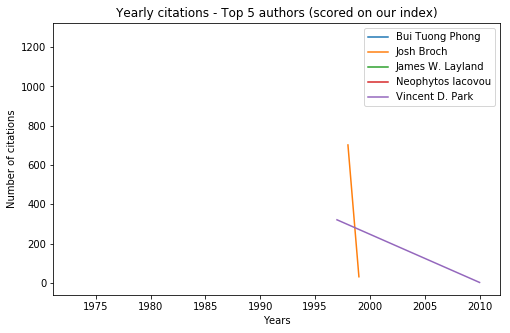

In [65]:
plt.figure(figsize=(8,5))
for author in top_n_our_index:
    year_wise = year_wise_citations(author)
    years = [x[0] for x in year_wise]
    citations = [x[1] for x in year_wise]
    plt.plot(years, citations)
    plt.xticks = np.arange(1985.0, 2018.0, step = 1.0)
plt.legend(top_n_our_index)
plt.xlabel('Years')
plt.ylabel('Number of citations')
plt.title('Yearly citations - Top 5 authors (scored on our index)')
plt.show()

411
201
580
374
199


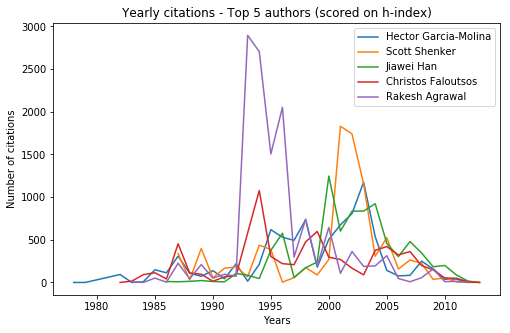

In [66]:
plt.figure(figsize=(8,5))
for author in top_n_h_index:
    year_wise = year_wise_citations(author)
    years = [x[0] for x in year_wise]
    citations = [x[1] for x in year_wise]
    plt.plot(years, citations)
    plt.xticks = np.arange(1985.0, 2018.0, step = 1.0)
plt.legend(top_n_h_index)
plt.xlabel('Years')
plt.ylabel('Number of citations')
plt.title('Yearly citations - Top 5 authors (scored on h-index)')
plt.show()

In [67]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

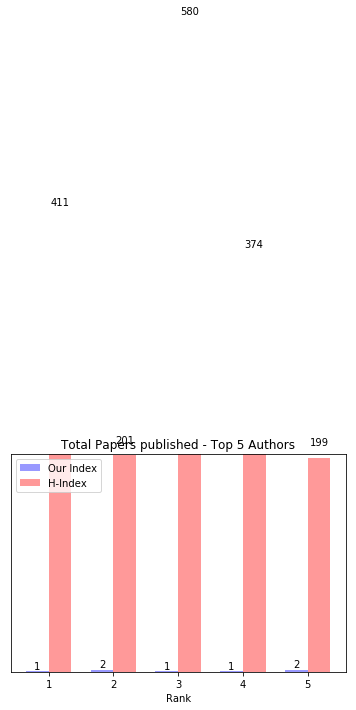

In [68]:
n_groups = 5

top_our_index = [len(author_map[author].paper_list) for author in top_n_our_index]
# std_men = (2, 3, 4, 1, 2)

top_h_index = [len(author_map[author].paper_list) for author in top_n_h_index]
# std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, top_our_index, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Our Index')

rects2 = ax.bar(index + bar_width, top_h_index, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='H-Index')

ax.set_xlabel('Rank')
# ax.set_ylabel('Papers published')
ax.set_title('Total Papers published - Top 5 Authors')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(range(1,6))
ax.set_yticks([])
ax.set_ylim(0, max(top_our_index) + 200)
ax.legend()
autolabel(rects1)
autolabel(rects2)
# fig.tight_layout()
plt.show()

/home/shivanggupta1994/venv/lib/python3.5/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


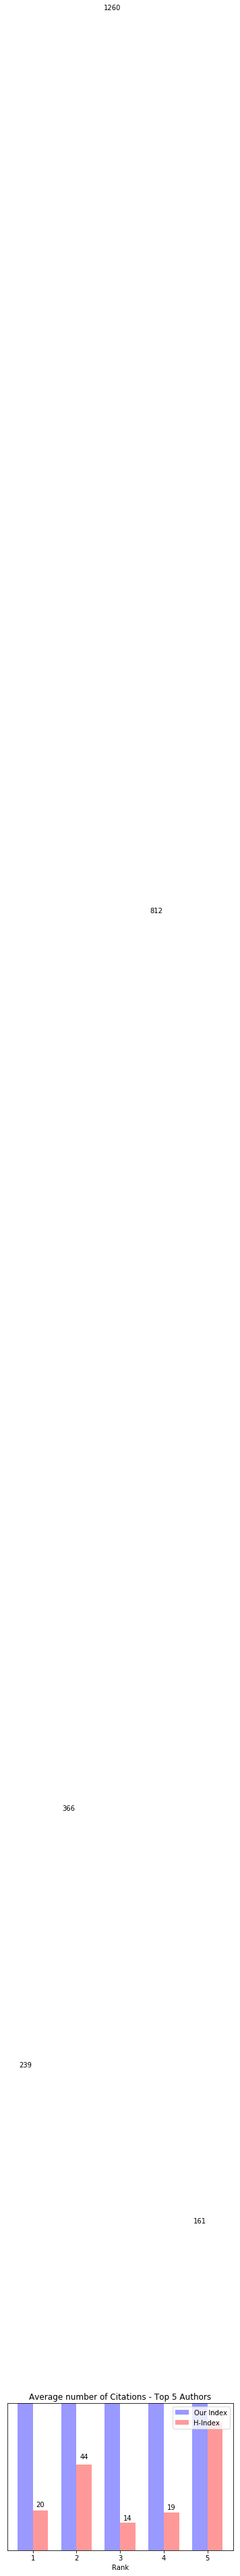

In [69]:
n_groups = 5

top_our_index = [np.average(author_map[author].citations) for author in top_n_our_index]
# std_men = (2, 3, 4, 1, 2)

top_h_index = [np.average(author_map[author].citations) for author in top_n_h_index]
# std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, top_our_index, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Our Index')

rects2 = ax.bar(index + bar_width, top_h_index, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='H-Index')

ax.set_xlabel('Rank')
# ax.set_ylabel('Average Citations')
ax.set_title('Average number of Citations - Top 5 Authors')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(range(1,6))
ax.set_yticks([])
ax.set_ylim(0, max(top_h_index) + 10)
ax.legend()

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

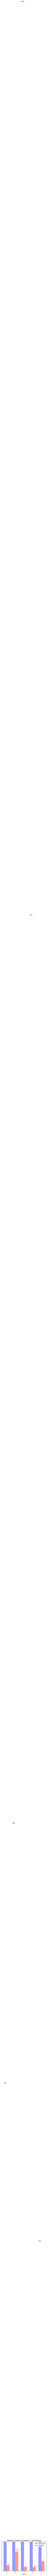

In [70]:
n_groups = 5

top_our_index = [np.median(author_map[author].citations) for author in top_n_our_index]
# std_men = (2, 3, 4, 1, 2)

top_h_index = [np.median(author_map[author].citations) for author in top_n_h_index]
# std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, top_our_index, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Our Index')

rects2 = ax.bar(index + bar_width, top_h_index, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='H-Index')

ax.set_xlabel('Rank')
# ax.set_ylabel('Median Citations')
ax.set_title('Median number of Citations - Top Authors')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(range(1,6))
ax.set_yticks([])
ax.set_ylim(0, max(top_h_index) + 5)
ax.legend()

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [71]:
[author_names_h.index(author) for author in top_n_our_index]

[146826, 86228, 335261, 195949, 97527]

In [72]:
[author_names.index(author) for author in top_n_h_index]

[255, 762, 188, 268, 1070]

In [73]:
common_authors = list(set(author_names[:100]) & set(author_names_h[:100]))

In [74]:
[author_names.index(author) for author in common_authors]

[]

In [75]:
[author_names_h.index(author) for author in common_authors]

[]

IndexError: list index out of range

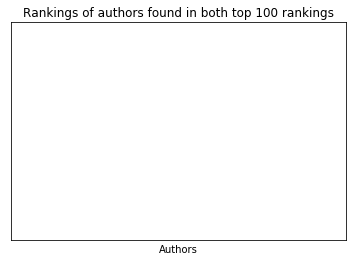

In [76]:
top_our_index = [author_names.index(author) + 1 for author in common_authors]
# std_men = (2, 3, 4, 1, 2)

top_h_index = [author_names_h.index(author) + 1 for author in common_authors]
# std_women = (3, 5, 2, 3, 3)

n_groups = len(top_our_index)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}
# plt.figure(figsize=(18,15))
fig.size = (18,15)
rects1 = ax.bar(index, top_our_index, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Our Index')

rects2 = ax.bar(index + bar_width, top_h_index, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='H-Index')

ax.set_xlabel('Authors')
# ax.set_ylabel('Ranking')
ax.set_title('Rankings of authors found in both top 100 rankings')
ax.set_xticks(index + bar_width / 2)
ax.set_yticks([])
ax.set_xticklabels(common_authors, rotation = 90)
ax.set_yticks([])
ax.set_ylim(0, 150)
ax.legend()

autolabel(rects1)
autolabel(rects2)
# fig.tight_layout()
plt.show()

In [85]:
def author_keywords(auth):
    keywords = []
    for paper in author_map[author].paper_list:
        keywords += citation_graph[paper].keywords
    return set(keywords)
        

In [90]:
len(author_keywords('Li Li'))

3856

946

In [ ]:
# plots

# 1. top n authors' citations distribution 
# 2. top n authors' no. of papers distribution
# 3. missing values graph
# 4. top n authors' h-index and our index comparison
# 5. top n authors' reverse comparison
# 
# citations distribution
# 


# score
# 1. use a constant rate of decay using publish date
# 2. people with a lot of citations need to be accounted for
# 3. young authors with lesser research time need to be weighted equally 
# 4. median citations for author instead of average
# 5. journal impact factor
# 6. domain of other fields


In [27]:
len(citation_graph)

0